# Task V - Predicting Percentiles of Target Metrics

The goal of this task is to use the histogram estimator from Task IV to predict the 20th, 50th, and 95th percentile values of the target Y .

In [ ]:
%run Task_IV.ipynb

### Task 5.3
Compute the 20th, 50th, and 95th percentile values of the target Y on the training set used in Task IV.

In [198]:
#Retrieve training set from task IV
%store -r X_KV_outlier_train X_KV_outlier_test Y_KV_outlier_train Y_KV_outlier_test
%store -r X_VoD_outlier_train X_VoD_outlier_test Y_VoD_outlier_train Y_VoD_outlier_test

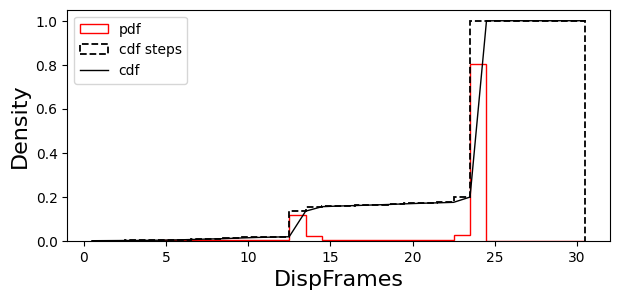

In [298]:
#VoD dataset

#Plots
plt.figure(figsize = (7,3))
plt.hist(Y_VoD_outlier_train, bins=30, range=[0.5,30.5], density = True,histtype='step', align='mid', color = "red", label ='pdf')
n_VoD, bins_VoD, patches_VoD = plt.hist(Y_VoD_outlier_train, bins=30, range=[0.5,30.5], density = True, histtype='step', linestyle = 'dashed', cumulative=True, align='mid', color = "black", linewidth=1.3, label='cdf steps')
plt.plot(bins_VoD,np.insert(n_VoD, 0, 0, axis=0), color = 'black', linewidth = 1, label = 'cdf')
plt.xlabel('DispFrames',fontsize=16)
plt.ylabel('Density', fontsize = 16)
plt.legend()
#plt.savefig('plot1.png',bbox_inches='tight')
plt.show() 

#Calculating quantiles using a formula: 
#Note that all the percentiles lie in the bin [23.5,24.5]

VoD_20 = bins_VoD[23]+(0.20-n_VoD[22])/(n_VoD[23]-n_VoD[22])  #20th percentile
VoD_50 = bins_VoD[23]+(0.50-n_VoD[22])/(n_VoD[23]-n_VoD[22])  #50th percentile
VoD_95 = bins_VoD[23]+(0.95-n_VoD[22])/(n_VoD[23]-n_VoD[22])  #95th percentile

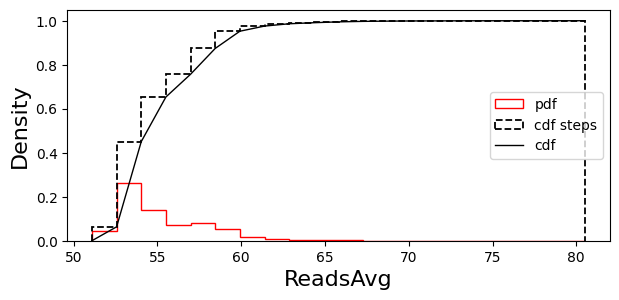

In [299]:
#KV dataset

#Plots

#Find minimum and maximum values y on the training set
y_min = np.min(Y_KV_outlier_train)
y_max = np.max(Y_KV_outlier_train)

plt.figure(figsize = (7,3))
plt.hist(Y_KV_outlier_train, bins=20, range=[y_min,y_max], density = True, histtype='step', align='mid', color = "red", label ='pdf')
n_KV, bins_KV, patches_KV = plt.hist(Y_KV_outlier_train, bins=20, range=[y_min,y_max], density = True, histtype='step', linestyle = 'dashed', cumulative=True, align='mid', color = "black", linewidth=1.3, label='cdf steps')
plt.plot(bins_KV,np.insert(n_KV, 0, 0, axis=0), color = 'black', linewidth = 1, label = 'cdf')
plt.xlabel('ReadsAvg',fontsize=16)
plt.ylabel('Density', fontsize = 16)
plt.legend()
#plt.savefig('plot2.png',bbox_inches='tight')


plt.show()
 
#Calculating quantiles using a formula: 

KV_20 = bins_KV[1]+(bins_KV[2]-bins_KV[1])*(0.20-n_KV[0])/(n_KV[1]-n_KV[0])  #20th percentile
KV_50 = bins_KV[2]+(bins_KV[3]-bins_KV[2])*(0.50-n_KV[1])/(n_KV[2]-n_KV[1])  #50th percentile
KV_95 = bins_KV[4]+(bins_KV[5]-bins_KV[4])*(0.95-n_KV[3])/(n_KV[4]-n_KV[3])  #95th percentile

### Task 5.4
Consider the x samples in your data set that belong to the first hour (3600 second) of the experiment. Produce a time series plot that shows the predicted 20th, 50th, and 95th percentile values of the target Y , together with the measured values

In [324]:
%store -r Y_VoD_outlier
%store -r Y_KV_outlier

In [308]:
#VoD dataset 

#Function that computes the predicted qth percentile for all the samples in the text set and stores them into one list
def a_VoD(q):
    
    #Comultative probabilities obtained from the random forest classifier
    def f(i): 
        return np.cumsum(rand_forest_VoD.predict_proba(X_VoD_outlier.iloc[i:i+1,:]).flatten()) 
    
    a_perc_VoD = []
    for i in range(3600):
        for x in range(25): 
            if ((q >= f(i)[x]) and (q < f(i)[x+1])):
                a_perc_VoD.append(bins_VoD[x]+(q-f(i)[x])/(f(i)[x+1]-f(i)[x]))
    return np.array(a_perc_VoD)

a_20_VoD = a_VoD(0.2) #Predicted 20th percentile values for all the samples in the test set
%store a_20_VoD

a_50_VoD = a_VoD(0.5) #Predicted 50th percentile values for all the samples in the test set
%store a_50_VoD

a_95_VoD = a_VoD(0.95) #Predicted 95th percentile values for all the samples in the test set
%store a_95_VoD

Stored 'a_20_VoD' (ndarray)
Stored 'a_50_VoD' (ndarray)
Stored 'a_95_VoD' (ndarray)


/var/folders/vl/5242n_212jn_y1kckcx4ydqc0000gn/T/ipykernel_22148/2090881189.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(range(3598), Y_VoD_outlier[:3598], linewidth=1, label='Measured')


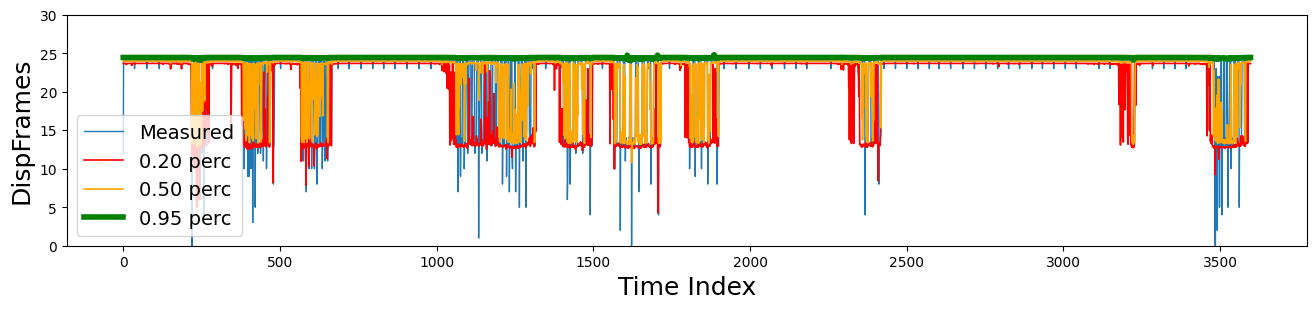

In [359]:
plt.figure(figsize=(16, 3))
plt.plot(range(3598), Y_VoD_outlier[:3598], linewidth=1, label='Measured')
plt.plot(range(3598), np.array(a_20_VoD)[:3598], linewidth=1.2, color='red', label='0.20 perc')
plt.plot(range(3598), np.array(a_50_VoD)[:3598], linewidth=1.2, color='orange', label='0.50 perc')
plt.plot(range(3598), np.array(a_95_VoD)[:3598], linewidth=4, color='green', label='0.95 perc')
plt.ylim([0,30])
plt.xlabel('Time Index',fontsize=18)
plt.ylabel('DispFrames',fontsize=18)
#plt.title("Times series plot for the target score 'ReadsAvg' corresponding to the dataset JNSM_KV_flashcrowd_1",fontsize=16)
plt.legend(fontsize=14)
#plt.savefig('time_series_VoD_V',bbox_inches='tight')
plt.show()

In [351]:
#KV dataset 

def g(i): #Comultative probabilities obtained from the random forest classifier
    return np.cumsum(rand_forest_KV.predict_proba(X_KV_outlier.iloc[i:i+1,:]).flatten()) 

#Function that computes the predicted qth percentile for all the samples in the text set and stores them into one list
def a_KV(q):
    a_perc_KV = []
    for i in range(3600):
        for x in range(18): 
            if ((q >= g(i)[x]) and (q < g(i)[x+1])):
                a_perc_KV.append(bins_KV[x]+(bins_KV[x+1]-bins_KV[x])*(q-g(i)[x])/(g(i)[x+1]-g(i)[x]))
        if q < g(i)[0]:
            a_perc_KV.append(bins_KV[0]+(bins_KV[1]-bins_KV[0])*(q-0/(g(i)[0]-0)))
        #if q >= g(i)[17]:
            #a_perc_KV.append(bins_KV[19]+(bins_KV[20]-bins_KV[19])*(q-g(i)[19])/(g(i)[20]-g(i)[19]))

    return np.array(a_perc_KV)

#a_20_KV = a_KV(0.2) #Predicted 20th percentile values for all the samples in the test set
#%store a_20_KV

#a_50_KV = a_KV(0.5) #Predicted 50th percentile values for all the samples in the test set
#%store a_50_KV

a_95_KV = a_KV(0.95) #Predicted 95th percentile values for all the samples in the test set
%store a_95_KV

Stored 'a_95_KV' (ndarray)


/var/folders/vl/5242n_212jn_y1kckcx4ydqc0000gn/T/ipykernel_22148/89144112.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(range(3600), Y_KV_outlier[:3600], linewidth=1, label='Measured')


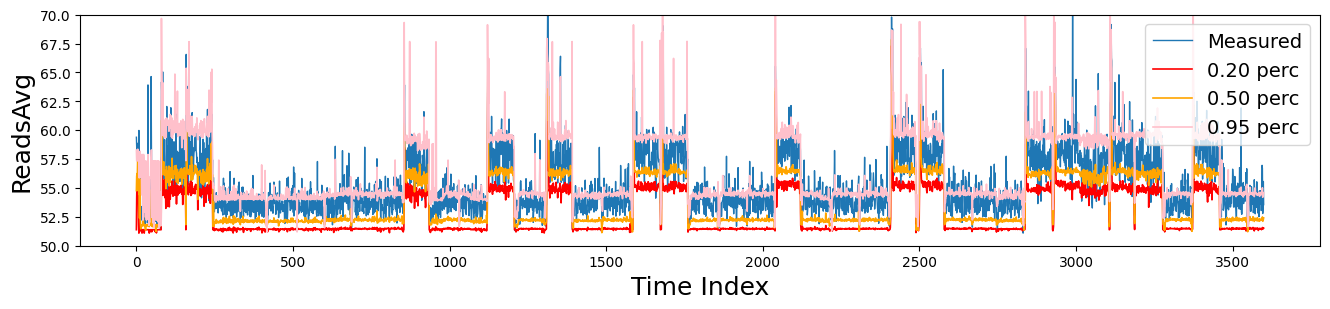

In [357]:
plt.figure(figsize=(16, 3))
plt.plot(range(3600), Y_KV_outlier[:3600], linewidth=1, label='Measured')
plt.plot(range(3600), np.array(a_20_KV)[:3600], linewidth=1.2, color='red', label='0.20 perc')
plt.plot(range(3600), np.array(a_50_KV)[:3600], linewidth=1.2, color='orange', label='0.50 perc')
plt.plot(range(3600), np.array(a_95_KV)[:3600], linewidth=1.2, color='pink', label='0.95 perc')
plt.ylim([50,70])
plt.xlabel('Time Index',fontsize=18)
plt.ylabel('ReadsAvg',fontsize=18)
#plt.title("Times series plot for the target score 'ReadsAvg' corresponding to the dataset JNSM_KV_flashcrowd_1",fontsize=16)
plt.legend(fontsize=14)
#plt.savefig('time_series_KV_V',bbox_inches='tight')
plt.show()

### Task 5.5

In [340]:
Y_VoD_outlier_test = np.array(Y_VoD_outlier_test).flatten()

#Estimation for 20th percentile 
indicator_a_20_VoD = [1 if  Y_VoD_outlier_test[i] <= a_20_VoD[i] else 0 for i in range(X_VoD_outlier_test.shape[0])]
perc_20_estimation = (1/X_VoD_outlier_test.shape[0])*np.sum(np.array(indicator_a_20_VoD))
print(perc_20_estimation)

#Estimation for 50th percentile
indicator_a_50_VoD = [1 if Y_VoD_outlier_test[i] <= a_50_VoD[i] else 0 for i in range(X_VoD_outlier_test.shape[0])]
perc_50_estimation = (1/X_VoD_outlier_test.shape[0])*np.sum(np.array(indicator_a_50_VoD))
print(perc_50_estimation)

#Estimation for 95th percentile
indicator_a_95_VoD = [1 if Y_VoD_outlier_test[i] <= a_95_VoD[i] else 0 for i in range(X_VoD_outlier_test.shape[0])]
perc_95_estimation = (1/X_VoD_outlier_test.shape[0])*np.sum(np.array(indicator_a_95_VoD))
print(perc_95_estimation)

0.16724336793540948
0.18973471741637832
1.0


In [360]:
Y_KV_outlier_test = np.array(Y_KV_outlier_test).flatten()

#Estimation for 20th percentile 
indicator_a_20_KV = [1 if  Y_KV_outlier_test[i] <= a_20_KV[i] else 0 for i in np.arange(X_KV_outlier_test.shape[0])]
perc_20_estimation = (1/X_KV_outlier_test.shape[0])*np.sum(np.array(indicator_a_20_KV))
print(perc_20_estimation)

#Estimation for 50th percentile
indicator_a_50_KV = [1 if Y_KV_outlier_test[i] <= a_50_KV[i] else 0 for i in range(X_KV_outlier_test.shape[0])]
perc_50_estimation = (1/X_KV_outlier_test.shape[0])*np.sum(np.array(indicator_a_50_KV))
print(perc_50_estimation)

#Estimation for 95th percentile
indicator_a_95_KV = [1 if Y_KV_outlier_test[i] <= a_95_KV[i] else 0 for i in range(X_KV_outlier_test.shape[0])]
perc_95_estimation = (1/X_KV_outlier_test.shape[0])*np.sum(np.array(indicator_a_95_KV))
print(perc_95_estimation)

0.1810939989378651
0.23844928305894847
0.6314391927774827
